# Ciencia de Datos - TP5

## Integrantes

- Ambroa, Nicolás - 229/13 - ambroanicolas@hotmail.com
- Gaustein, Diego - 586/09 - diego@gaustein.com.ar

## 1) Implementación
Implemente el modelo en pymc3 para los priors Beta(1,1) y Beta(100,100), y grafique las posteriors
resultantes de observar 6 caras de 6 tiradas.

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2024.73it/s]


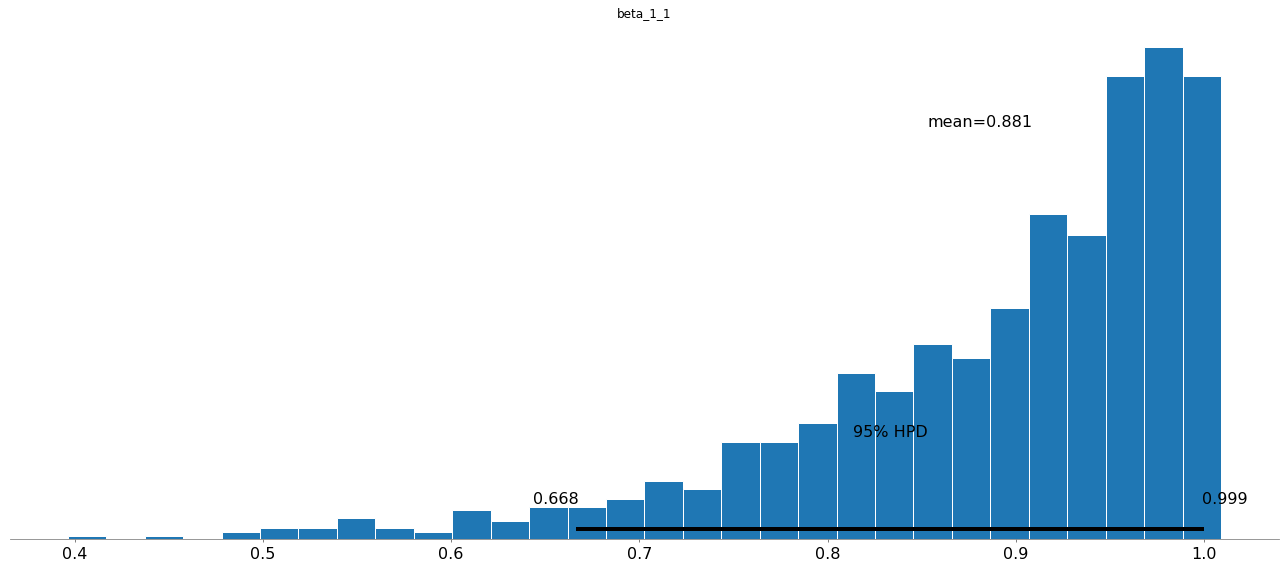

In [154]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import beta
%matplotlib inline
plt.rcParams["figure.figsize"] = (18, 8)
random.seed(42)

# Cálculos para Beta (1,1)
model_beta_1_1 = pm.Model()
with model_beta_1_1:
    beta_1_1 = pm.Beta('beta_1_1', 1, 1)
    likelihood = pm.Binomial('likelihood', n=6, p=beta_1_1, observed=6) # Binomial con #tiradas, prior y #exitos.
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    pm.plot_posterior(trace)

    

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2062.25it/s]


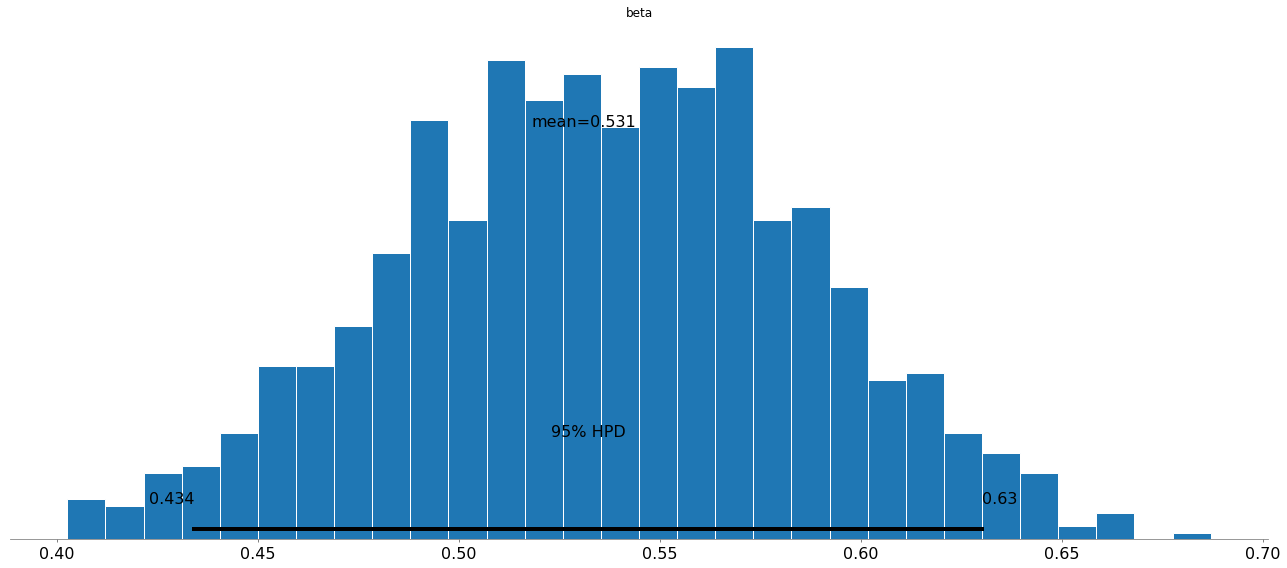

In [155]:
model_beta_100_100 = pm.Model()
with model_beta_100_100:
    beta = pm.Beta('beta', alpha=50, beta=50)
    likelihood = pm.Binomial('likelihood', n=6, p=beta, observed=6) # Binomial con #tiradas, prior y #exitos
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    pm.plot_posterior(trace)

## 2. Resúmenes
Calcule el MAP (máximo a posteriori) y las medias de ambas posteriors.

In [156]:
# Cálculos para Beta(1,1)
with model_beta_1_1:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(1,1) son: {}, {}".format(MAP['beta_1_1'], np.mean(trace['beta_1_1'])))

# Cálculos para Beta(100,100)
with model_beta_100_100:
    MAP = pm.find_MAP()
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    print("El MAP y la media del modelo Beta(100,100) son: {}, {}".format(MAP['beta'], np.mean(trace['beta'])))


logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2326.94it/s]  
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2183.33it/s]


El MAP y la media del modelo Beta(1,1) son: 0.9999984620831801, 0.8823625734462696


logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1598.13it/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2154.33it/s]


El MAP y la media del modelo Beta(100,100) son: 0.5288461537406147, 0.5239712096589619


## 3) Predicción

Prediga, para ambos priors, el resultado de una nueva tirada de moneda.

In [157]:
# Predicción para la #de caras de nuevos experimientos.

# Cálculos para Beta(1,1)
with model_beta_1_1:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_1_1, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])

# Cálculos para Beta(100,100)
with model_beta_100_100:
    trace = pm.sample(1000, progressbar=True, random_seed=123)
    ppc = pm.sample_ppc(trace, samples=1, model=model_beta_100_100, size=1) # Genera un nuevo experimento (6 Tiradas)
    print(ppc['likelihood'][0])


Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1/1 [00:00<00:00, 2593.88it/s]
Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...


[5]


100%|██████████| 1/1 [00:00<00:00, 1576.81it/s]

[3]


## 4) Otros datos
Repita los puntos anteriores para una situación en la que se observan 20 caras de 20 tiradas, y otra en
la que se observan 3 caras de 3 tiradas. ¿Qué puede concluir de los priors elegidos? ¿Y del modelo en
general?

### 4) Punto 1) para ambos experimentos

In [185]:
# Cálculos para Beta(1,1)

def model_and_trace(alpha_beta, n):
    nombre = 'Beta {0}, {0}. {1} tiradas'.format(alpha_beta, n)
    model = pm.Model(nombre)
    with model:
        beta = pm.Beta('beta', alpha_beta, alpha_beta)
        likelihood = pm.Binomial('likelihood', n=n, p=beta, observed=n)
        trace = pm.sample(1000, progressbar=True, random_seed=123)
    return model, trace
        
def map_and_mean(model, trace):
    with model:
        MAP = pm.find_MAP()
        print("El MAP y la media del modelo {} son: {}, {}".format(model.name, MAP[model.name+'_beta'], np.mean(trace[model.name+'_beta'])))
        
def predict_sample(model, trace, sample_size):
    with model:
        ppc = pm.sample_ppc(trace, samples=1, model=model, size=sample_size, random_seed=123) # Genera un nuevo experimento (6 Tiradas)
        name = model.name+'_likelihood'
        print("El sample predicho para el modelo {} resulta: {}".format(model.name, ppc[name][0][0]))
    return ppc

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2000.79it/s]


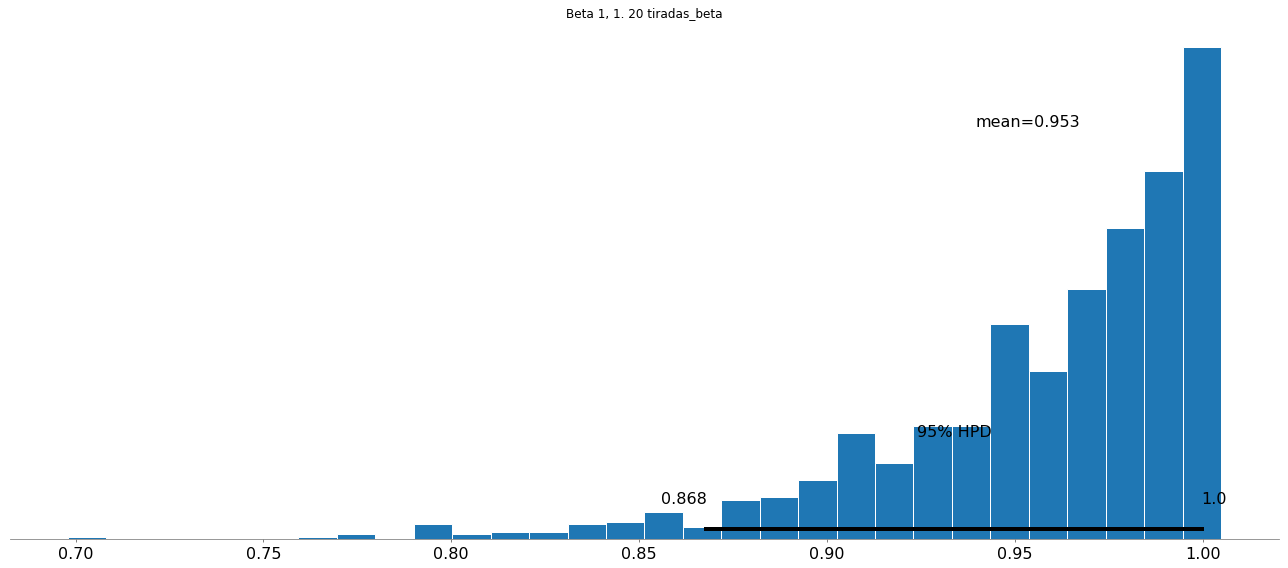

In [159]:
# 20 caras de 20 tiradas
b1_model_20_20, b1_trace_20_20 = model_and_trace(1, 20)
with b1_model_20_20:
    pm.plot_posterior(b1_trace_20_20)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1706.76it/s]


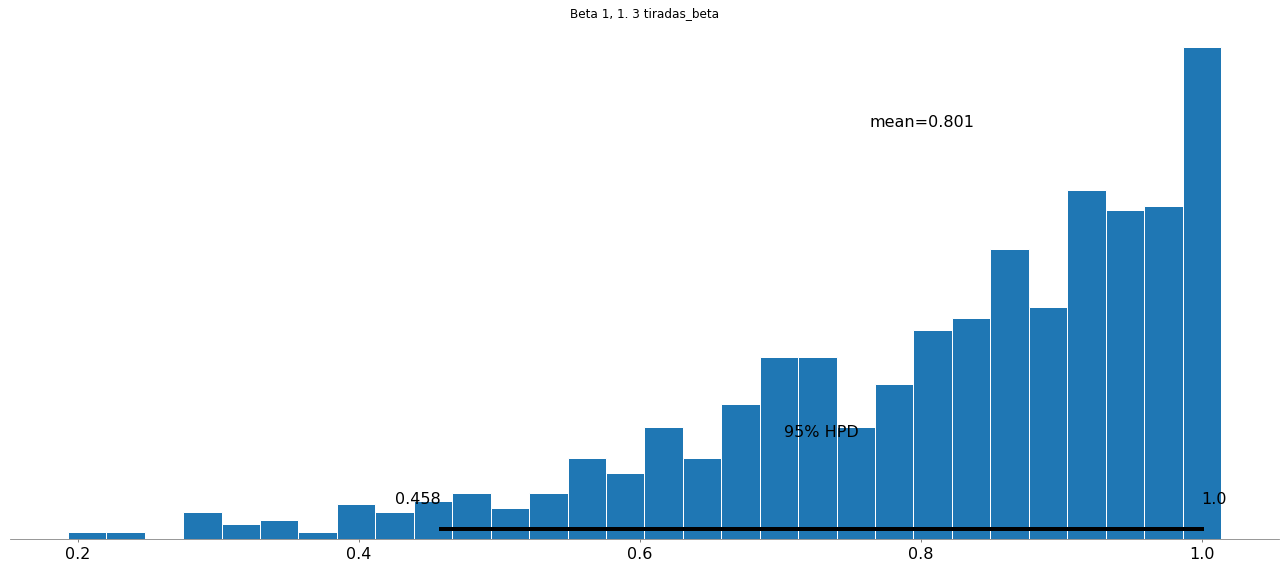

In [160]:
# 3 caras de 3 tiradas
b1_model_3_3, b1_trace_3_3 = model_and_trace(1, 3)
with b1_model_3_3:
    pm.plot_posterior(b1_trace_3_3)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 1793.69it/s]


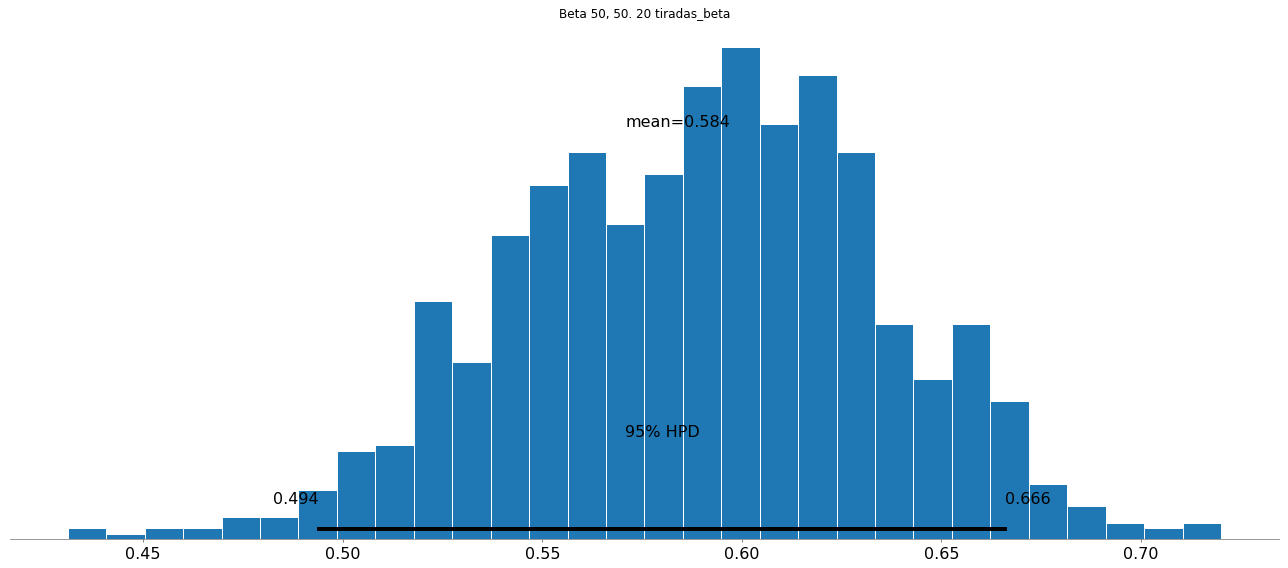

In [161]:
# Cálculos para Beta(100,100)

# 20 caras de 20 tiradas
b100_model_20_20, b100_trace_20_20 = model_and_trace(50, 20)
with b100_model_20_20:
    pm.plot_posterior(b100_trace_20_20)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 1500/1500 [00:00<00:00, 2158.50it/s]


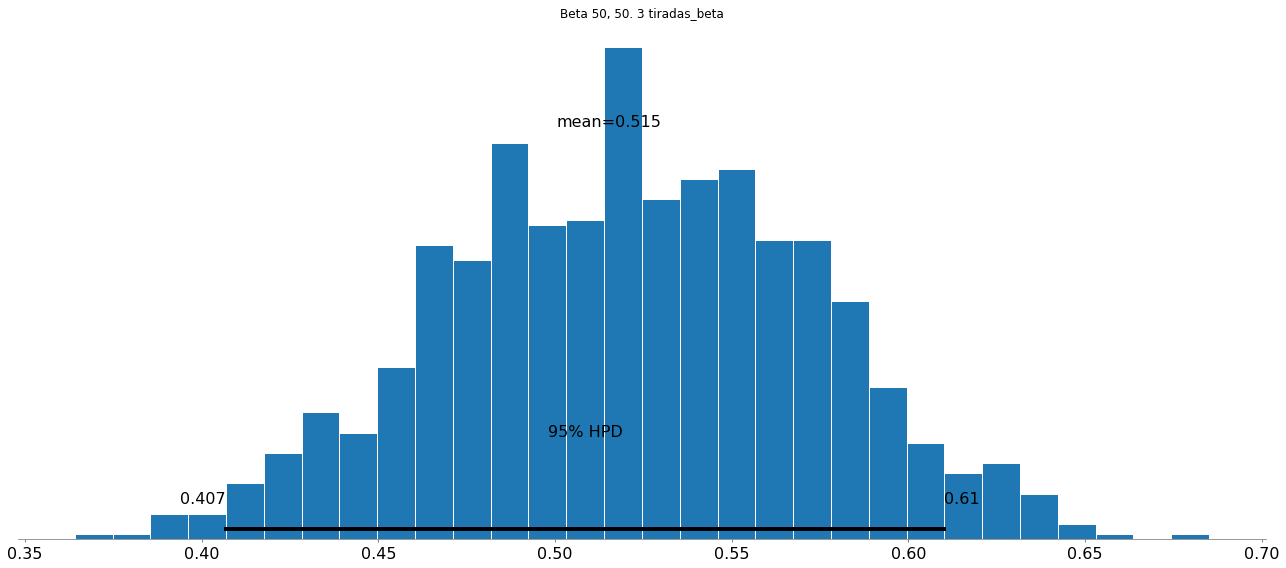

In [162]:
# 3 caras de 3 tiradas
b100_model_3_3, b100_trace_3_3 = model_and_trace(50, 3)
with b100_model_3_3:
    pm.plot_posterior(b100_trace_3_3)

### Punto 2) para ambos experimentos

In [163]:
# Cálculos para Beta(1,1)
map_and_mean(b1_model_20_20, b1_trace_20_20)
map_and_mean(b1_model_3_3, b1_trace_3_3)

# Cálculos para Beta(100,100)
map_and_mean(b100_model_20_20, b100_trace_20_20)
map_and_mean(b100_model_3_3, b100_trace_3_3)

logp = -7.0849e-06, ||grad|| = 7.6896e-06: 100%|██████████| 22/22 [00:00<00:00, 948.16it/s]  


El MAP y la media del modelo Beta 1, 1. 20 tiradas son: 0.9999996155210419, 0.9534166619664325


logp = -0.0011816, ||grad|| = 0.0011814: 100%|██████████| 19/19 [00:00<00:00, 2430.07it/s]  


El MAP y la media del modelo Beta 1, 1. 3 tiradas son: 0.999996924163579, 0.8008178207815302


logp = -11.789, ||grad|| = 10: 100%|██████████| 6/6 [00:00<00:00, 1751.52it/s]


El MAP y la media del modelo Beta 50, 50. 20 tiradas son: 0.5847457607428355, 0.5840618084784137


logp = -0.0051492, ||grad|| = 1.5: 100%|██████████| 6/6 [00:00<00:00, 753.40it/s]

El MAP y la media del modelo Beta 50, 50. 3 tiradas son: 0.5148514851428415, 0.51528520631017


### Punto 3) para ambos experimentos

In [189]:
# Cálculos para Beta(1,1)
b1_20_20_ppc = predict_sample(b1_model_20_20, b1_trace_20_20, 1)
b1_3_3_ppc = predict_sample(b1_model_3_3, b1_trace_3_3, 1)

# Cálculos para Beta(100,100)
b100_20_20_ppc = predict_sample(b100_model_20_20, b100_trace_20_20, 1)
b100_3_3_ppc = predict_sample(b100_model_3_3, b100_trace_3_3, 1)


100%|██████████| 1/1 [00:00<00:00, 1157.37it/s]

El sample predicho para el modelo Beta 1, 1. 20 tiradas resulta: 19
El sample predicho para el modelo Beta 1, 1. 3 tiradas resulta: 2
El sample predicho para el modelo Beta 50, 50. 20 tiradas resulta: 12
El sample predicho para el modelo Beta 50, 50. 3 tiradas resulta: 2
